In [9]:
ls *bank*

 Volume in drive C is Windows
 Volume Serial Number is F678-42D0

 Directory of C:\Users\Shiva\Documents\Data Science\Assignments

12/24/2022  11:08 AM         3,453,676 Bank-full.xlsx
12/20/2022  05:46 PM               108 Problem-Statement(Bank_data).txt
               2 File(s)      3,453,784 bytes
               0 Dir(s)  71,175,438,336 bytes free


In [83]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [84]:
data=pd.read_excel("Bank-full.xlsx")
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20396,33,unknown,married,secondary,no,335,no,no,cellular,11,aug,566,7,-1,0,unknown,no
19773,34,technician,single,secondary,no,161,no,yes,cellular,8,aug,61,2,-1,0,unknown,no
23455,32,management,single,tertiary,no,1134,no,no,cellular,28,aug,85,4,-1,0,unknown,no
5474,32,technician,married,secondary,no,221,yes,no,unknown,23,may,224,4,-1,0,unknown,no
23206,41,management,married,tertiary,no,6563,no,no,cellular,27,aug,136,8,-1,0,unknown,no


In [85]:
encoder=LabelEncoder()
encoder1=OneHotEncoder()
data['job']=encoder.fit_transform(data['job'])
data['marital']=encoder.fit_transform(data['marital'])
data['education']=encoder.fit_transform(data['education'])
data['default']=encoder.fit_transform(data['default'])
data['housing']=encoder.fit_transform(data['housing'])
data['loan']=encoder.fit_transform(data['loan'])
data['contact']=encoder.fit_transform(data['contact'])
data['month']=encoder.fit_transform(data['month'])
data['poutcome']=encoder.fit_transform(data['poutcome'])
data['y']=encoder.fit_transform(data['y'])

In [38]:
data.sample(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37833,27,1,1,1,0,-330,1,1,0,14,8,88,1,353,2,0,0
45036,28,4,1,2,0,1918,0,0,0,18,10,333,1,616,1,0,0
39207,29,2,2,2,0,219,1,0,0,18,8,76,2,356,1,0,0
29045,36,9,0,1,0,-94,1,0,0,2,3,185,1,252,2,0,0
22986,55,4,0,2,0,-612,0,0,0,26,1,131,2,-1,0,3,0
19738,32,4,1,2,0,183,1,0,0,7,1,112,3,-1,0,3,0


In [39]:
data['y'].value_counts() #imbalance data

0    39922
1     5289
Name: y, dtype: int64

In [40]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [53]:
x=data.iloc[:,0:-1]
y=data['y']

In [54]:
model=LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [55]:
model.coef_

array([[-3.16984909e-02,  1.46110130e-02, -9.21401092e-02,
        -1.31753430e-02, -4.79493274e-03,  4.00571071e-05,
        -1.81645823e-01, -5.35202325e-02, -1.86791894e-01,
        -8.42561146e-03, -5.98882009e-02,  3.27172508e-03,
        -2.67094291e-01, -1.23675655e-03,  1.20020264e-01,
        -1.80611409e-01]])

In [56]:
model.intercept_

array([-0.07053614])

In [57]:
y_pred=model.predict(x)

In [67]:
df= pd.DataFrame({'Actual':y,
                         'Predicted': y_pred})

In [68]:
df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [69]:
print(df['Actual'].value_counts())
print("=================================")
print(df['Predicted'].value_counts())

0    39922
1     5289
Name: Actual, dtype: int64
0    43716
1     1495
Name: Predicted, dtype: int64


In [60]:
cm=confusion_matrix(y,y_pred)
print(cm)

[[39279   643]
 [ 4437   852]]


In [61]:
ac(y,y_pred)

0.8876379642122493

In [62]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



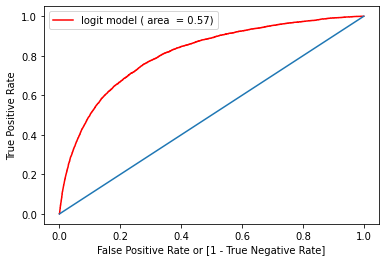

In [64]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

In [65]:
pd.DataFrame({"tpr":tpr,"fpr":fpr,"threshold":thresholds})

,tpr,fpr,threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.000025,1.000000e+00
2,0.000000,0.000100,9.998188e-01
3,0.000189,0.000100,9.998182e-01
4,0.000189,0.000150,9.996101e-01
...,...,...,...
7730,0.999622,0.993362,4.618835e-04
7731,0.999811,0.993362,4.594089e-04
7732,0.999811,0.997796,5.646037e-05
7733,1.000000,0.997796,5.444018e-05


In [77]:
auc

0.5724913226281891

In [80]:
#Cross Validation
all_accuracies=cross_val_score(estimator=model, X=x, y=y, cv=5)

In [82]:
all_accuracies.mean()

0.8778389387008708